In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns

In [43]:
#import dataset dari Google Drive memakai path
path = "filtered_property_data.csv"
df = pd.read_csv(path, index_col=0)

In [33]:
df.head()

,listing-title,agent,area,district,sub-district,land-size,bedroom,bathroom,listing-price
listing-link,,,,,,,,,
https://www.rumah.com/listing-properti/dijual-jual-cepat-cluster-aquamarine-oleh-vonni-21410668,dijual jual cepat cluster aquamarine,vonni,Gading Serpong,Serpong,Serpong,420,5,5,6.900000e+09
https://www.rumah.com/listing-properti/dijual-jual-cepat-cluster-alexandrite-oleh-vonni-21427584,dijual jual cepat cluster alexandrite,vonni,Gading Serpong,Serpong,Serpong,190,3,3,4.500000e+09
https://www.rumah.com/listing-properti/dijual-jual-cepat-cluster-vivaldi-oleh-vonni-21427802,dijual jual cepat cluster vivaldi,vonni,Gading Serpong,Serpong,Serpong,132,3,3,3.950000e+09
https://www.rumah.com/listing-properti/dijual-jual-cepat-cluster-starling-oleh-vonni-21428329,dijual jual cepat cluster starling,vonni,Gading Serpong,Serpong,Serpong,220,4,3,3.300000e+09
https://www.rumah.com/listing-properti/dijual-jual-cepat-cluster-newton-oleh-vonni-21428706,dijual jual cepat cluster newton,vonni,Gading Serpong,Serpong,Serpong,180,3,2,3.500000e+09


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23711 entries, https://www.rumah.com/listing-properti/dijual-jual-cepat-cluster-aquamarine-oleh-vonni-21410668 to https://www.rumah.com/listing-properti/dijual-dijual-rumah-cantik-full-furnished-bintaro-jaya-sektor-9-1223-ry-oleh-indriawati-savitri-20808981
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   listing-title  23711 non-null  object 
 1   agent          23711 non-null  object 
 2   area           20404 non-null  object 
 3   district       10464 non-null  object 
 4   sub-district   17482 non-null  object 
 5   land-size      23711 non-null  int64  
 6   bedroom        23711 non-null  int64  
 7   bathroom       23711 non-null  int64  
 8   listing-price  23711 non-null  float64
dtypes: float64(1), int64(3), object(5)
memory usage: 1.8+ MB


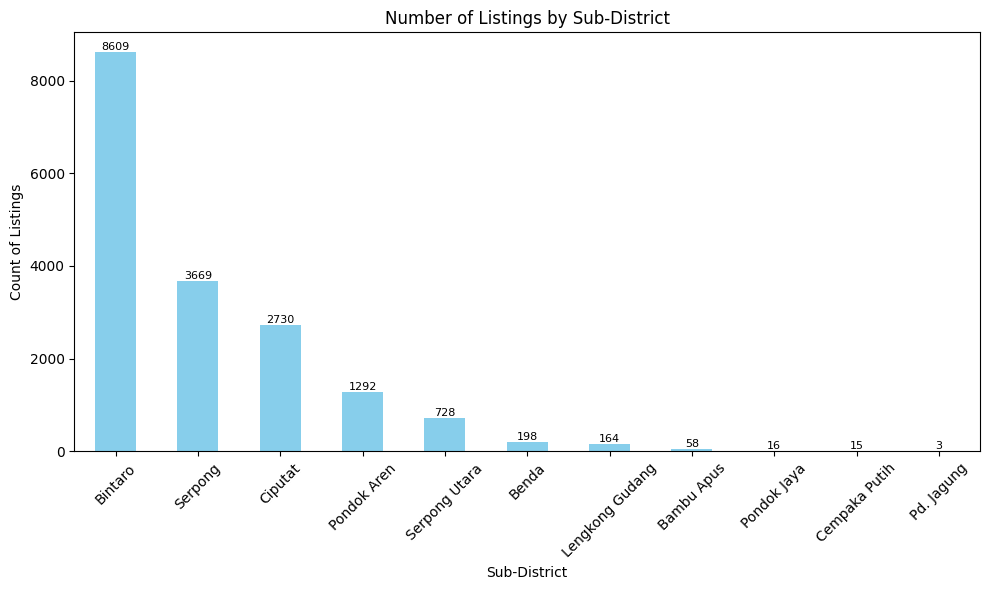

In [45]:
# Kode ini membuat plot batang yang menunjukkan jumlah listing per sub-distrik dengan menggunakan data dari kolom 'sub-district' dalam DataFrame.
subdistrict_counts = df['sub-district'].value_counts()

plt.figure(figsize=(10, 6))
bars = subdistrict_counts.plot(kind='bar', color='skyblue')

for bar, count in zip(bars.patches, subdistrict_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count, ha='center', va='bottom', fontsize=8)

plt.title('Number of Listings by Sub-District')
plt.xlabel('Sub-District')
plt.ylabel('Count of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


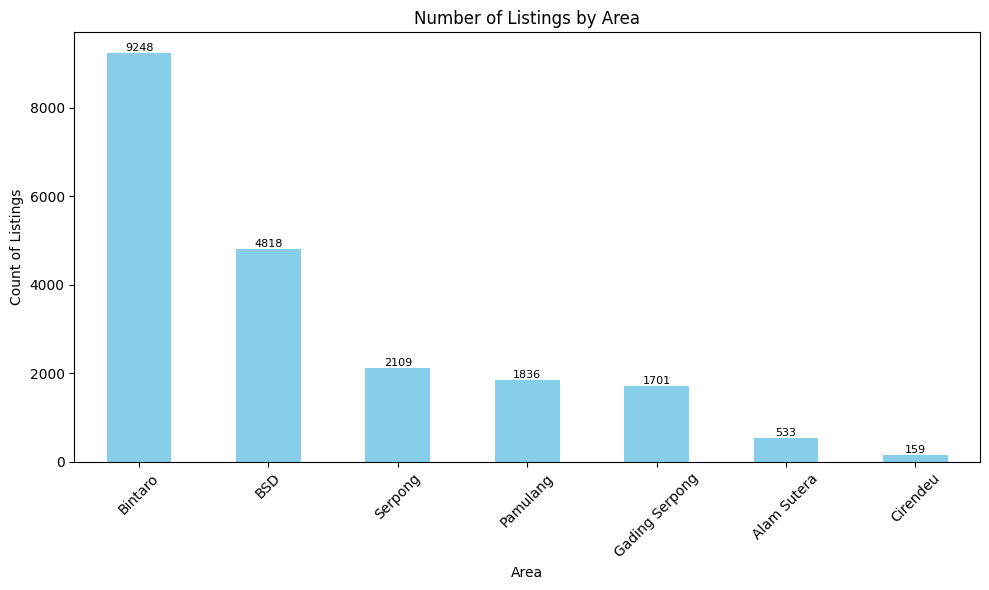

In [46]:
# Kode ini membuat plot batang yang menunjukkan jumlah listing per area dengan menggunakan data dari kolom 'area' dalam DataFrame.
area_counts = df['area'].value_counts()

plt.figure(figsize=(10, 6))
bars = area_counts.plot(kind='bar', color='skyblue')

for bar, count in zip(bars.patches, area_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), count, ha='center', va='bottom', fontsize=8)

plt.title('Number of Listings by Area')
plt.xlabel('Area')
plt.ylabel('Count of Listings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


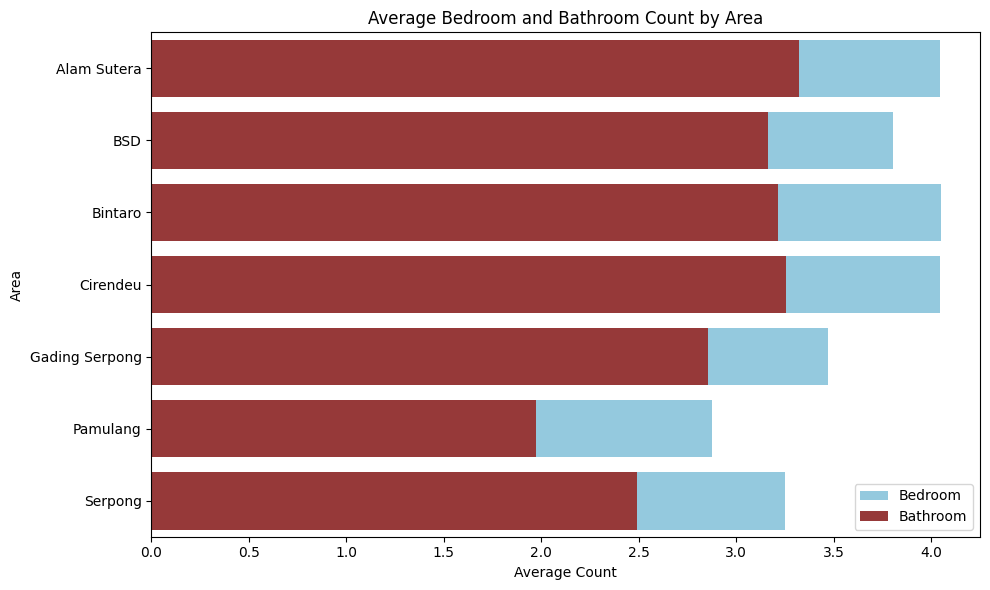

In [47]:
avg_data = df.groupby('area')[['bedroom', 'bathroom']].mean().reset_index()


# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='bedroom', y='area', data=avg_data, color='skyblue', label='Bedroom')
sns.barplot(x='bathroom', y='area', data=avg_data, color='brown', label='Bathroom')
plt.xlabel('Average Count')
plt.ylabel('Area')
plt.title('Average Bedroom and Bathroom Count by Area')
plt.legend()
plt.tight_layout()
plt.show()

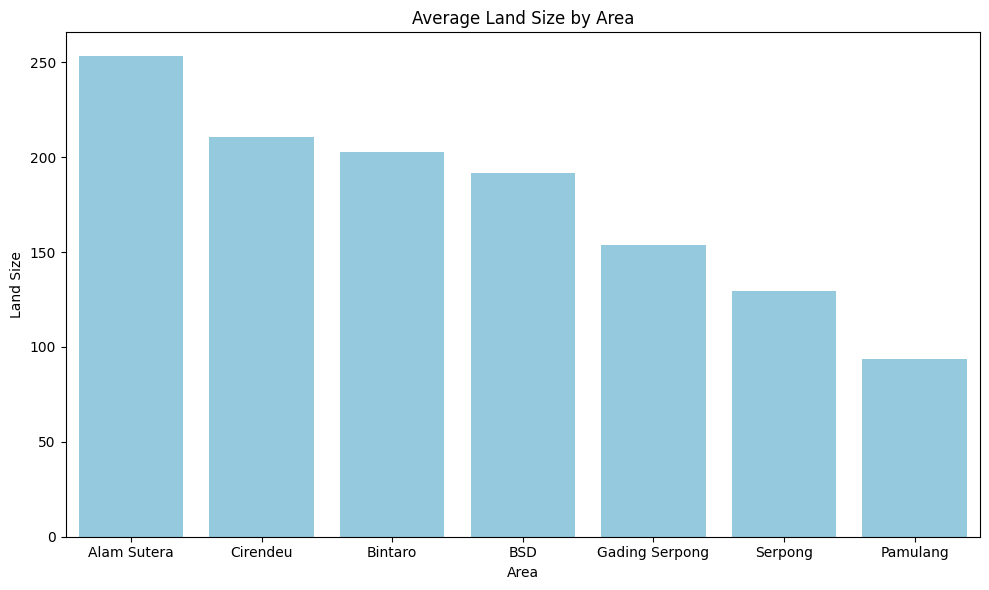

In [48]:
avg_landsize = df.groupby('area')['land-size'].mean().reset_index()

avg_landsize = avg_landsize.sort_values(by='land-size', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='area', y='land-size', data=avg_landsize, color='skyblue')
plt.xlabel('Area')
plt.ylabel('Land Size')
plt.title('Average Land Size by Area')
plt.tight_layout()
plt.show()

# K-Means Clustering

In [49]:
# Kode ini memeriksa nilai yang hilang, menghapusnya jika ada, dan menstandarisasi data numerik dalam DataFrame.

# Memeriksa nilai yang hilang
print(df.isnull().sum())

# Mengisi atau menghapus nilai yang hilang (jika ada)
df = df.dropna()

# Menstandarisasi data (jika diperlukan)
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.select_dtypes(include=[np.number]))  # Hanya menstandarisasi kolom numerik

# Mengonversi data yang telah distandarisasi kembali ke DataFrame untuk memudahkan penanganan
scaled_df = pd.DataFrame(scaled_df, columns=df.select_dtypes(include=[np.number]).columns)
print(scaled_df.head())



listing-title        0
agent                0
area              3307
district         13247
sub-district      6229
land-size            0
bedroom              0
bathroom             0
listing-price        0
dtype: int64
   land-size   bedroom  bathroom  listing-price
0   2.400490  1.302361  1.902017       1.725836
1   0.414958 -0.321232  0.270527       0.760831
2  -0.085741 -0.321232  0.270527       0.539684
3   0.673941  0.490565  0.270527       0.278329
4   0.328631 -0.321232 -0.545218       0.358746


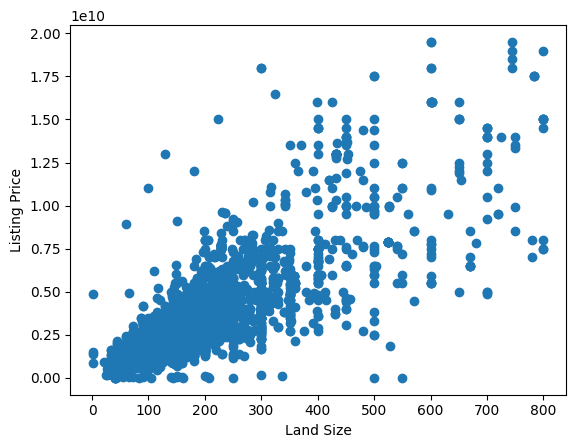

In [50]:
# Kode ini membuat scatter plot untuk menunjukkan hubungan antara ukuran lahan dan harga listing.
plt.scatter(df['land-size'], df['listing-price'])
plt.xlabel('Land Size')
plt.ylabel('Listing Price')
plt.show()

In [51]:
# Kode ini mengekstrak nilai-nilai dari kolom 'land-size' dan 'listing-price' dalam DataFrame ke dalam array numpy untuk digunakan sebagai
# data pelatihan, dan menampilkan lima baris pertama.
x_train = df[['land-size', 'listing-price']].values
x_train[:5]


array([[4.20e+02, 6.90e+09],
       [1.90e+02, 4.50e+09],
       [1.32e+02, 3.95e+09],
       [2.20e+02, 3.30e+09],
       [1.80e+02, 3.50e+09]])

In [52]:
# Kode ini melakukan normalisasi data pelatihan menggunakan MinMaxScaler dari sklearn untuk memastikan semua
# nilai berada dalam rentang [0, 1], dan menampilkan lima baris pertama dari data yang telah dinormalisasi.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_train[:5]


array([[0.52440551, 0.35379363],
       [0.23654568, 0.2307067 ],
       [0.16395494, 0.20249928],
       [0.27409262, 0.16916324],
       [0.22403004, 0.17942048]])

In [68]:
# Kode ini menghitung inertia untuk berbagai jumlah cluster (dari 1 hingga 9) menggunakan KMeans, dan menyimpan nilai inertia untuk setiap jumlah cluster.
inertias = []
k_range = range(1, 10)
for k in k_range:
    km = KMeans(n_clusters=k).fit(x_train)
    inertias.append(km.inertia_)
print(inertias[k-1])

15.54261535624719


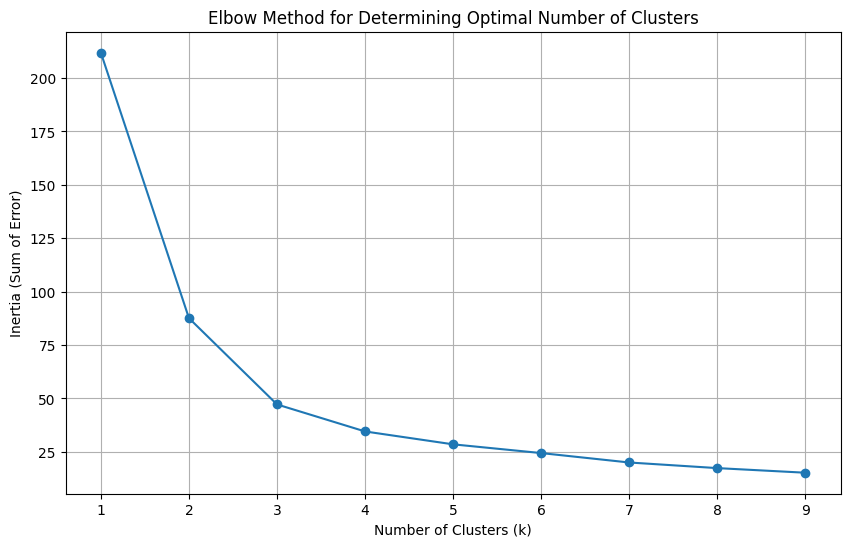

In [54]:
# Kode ini membuat plot untuk menunjukkan hubungan antara jumlah cluster (k) dan inertia (jumlah kesalahan) untuk menentukan jumlah cluster yang optimal.
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Sum of Error)')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.grid(True)
plt.show()

In [55]:
# Kode ini mengimpor KMeans dari sklearn dan menginisialisasi model KMeans dengan 3 cluster.
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=3)
kmean

KMeans(n_clusters=3)

In [56]:
# Kode ini melatih model KMeans dengan data pelatihan yang telah dinormalisasi dan memprediksi cluster untuk setiap data point.
y_cluster = kmean.fit_predict(x_train)
y_cluster

array([1, 2, 0, ..., 0, 0, 0])

In [57]:
# Kode ini menambahkan hasil prediksi cluster sebagai kolom baru ke dalam DataFrame asli.
df['cluster'] = y_cluster
df

,listing-title,agent,area,district,sub-district,land-size,bedroom,bathroom,listing-price,cluster
listing-link,,,,,,,,,,
https://www.rumah.com/listing-properti/dijual-jual-cepat-cluster-aquamarine-oleh-vonni-21410668,dijual jual cepat cluster aquamarine,vonni,Gading Serpong,Serpong,Serpong,420,5,5,6.900000e+09,1
https://www.rumah.com/listing-properti/dijual-jual-cepat-cluster-alexandrite-oleh-vonni-21427584,dijual jual cepat cluster alexandrite,vonni,Gading Serpong,Serpong,Serpong,190,3,3,4.500000e+09,2
https://www.rumah.com/listing-properti/dijual-jual-cepat-cluster-vivaldi-oleh-vonni-21427802,dijual jual cepat cluster vivaldi,vonni,Gading Serpong,Serpong,Serpong,132,3,3,3.950000e+09,0
https://www.rumah.com/listing-properti/dijual-jual-cepat-cluster-starling-oleh-vonni-21428329,dijual jual cepat cluster starling,vonni,Gading Serpong,Serpong,Serpong,220,4,3,3.300000e+09,2
https://www.rumah.com/listing-properti/dijual-jual-cepat-cluster-newton-oleh-vonni-21428706,dijual jual cepat cluster newton,vonni,Gading Serpong,Serpong,Serpong,180,3,2,3.500000e+09,2
...,...,...,...,...,...,...,...,...,...,...
https://www.rumah.com/listing-properti/dijual-rumah-modern-murah-di-bintaro-sektor-2-oleh-suharto-gunadis-17985237,dijual rumah modern murah di bintaro sektor 2,suharto gunadis,Bintaro,Ciputat,Ciputat,138,5,4,2.175000e+09,0
https://www.rumah.com/listing-properti/dijual-rumah-2-lantai-murah-free-biaya-biaya-akses-tol-bsd-oleh-suharto-gunadis-17974327,dijual rumah 2 lantai murah free biaya biaya a...,suharto gunadis,Pamulang,Pamulang,Benda,83,3,3,1.296000e+09,0
https://www.rumah.com/listing-properti/dijual-rumah-di-adipati-residence-graha-raya-bintaro-oleh-sriayudia-21519753,dijual rumah di adipati residence graha raya b...,sriayudia,Serpong,Serpong,Serpong Utara,90,3,3,1.300000e+09,0


In [58]:
# Kode ini menampilkan pusat-pusat cluster yang dihasilkan oleh model KMeans.
kmean.cluster_centers_

array([[0.1089949 , 0.07702595],
       [0.66712683, 0.56005446],
       [0.30080184, 0.23575537]])

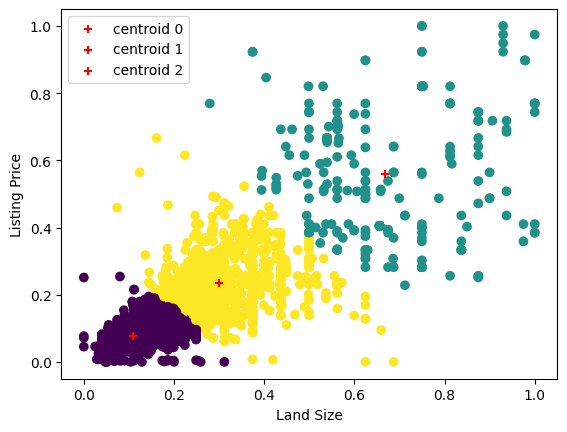

In [59]:
plt.scatter(x_train[:, 0], x_train[:, 1], c=kmean.labels_)
plt.scatter(kmean.cluster_centers_[0, 0], kmean.cluster_centers_[0, 1], c='red', marker='+', label='centroid 0')
plt.scatter(kmean.cluster_centers_[1, 0], kmean.cluster_centers_[1, 1], c='red', marker='+', label='centroid 1')
plt.scatter(kmean.cluster_centers_[2, 0], kmean.cluster_centers_[2, 1], c='red', marker='+', label='centroid 2')
plt.xlabel('Land Size')
plt.ylabel('Listing Price')
plt.legend()
plt.show()

# Naive Bayes

In [60]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

In [61]:
# Menginisialisasi fitur dan target
features = df[['land-size', 'bedroom', 'bathroom', 'listing-price']]
target = df['cluster']

In [62]:
# Membagi data menjadi data pelatihan dan data uji
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [63]:
# Menginisialisasi dan melatih model Gaussian Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [64]:
# Prediksi pada data uji
y_pred = nb_model.predict(X_test)

In [65]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.9255131964809384
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1240
           1       0.92      0.71      0.80        76
           2       0.86      0.81      0.83       389

    accuracy                           0.93      1705
   macro avg       0.91      0.83      0.86      1705
weighted avg       0.92      0.93      0.92      1705

